In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings

UserWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [2]:
# This is unsupervised cause we a trying to find a pattern rather than finding
# a result.


# In supervised learning, the goal is to predict outcomes for new data. 
#You know up front the type of results to expect. With an unsupervised learning
#algorithm, the goal is to get insights from large volumes of new data. The
#machine learning itself determines what is different or interesting from the
#dataset.

In [3]:
data_df = pd.read_csv('data_h3_3337.csv')
data_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# How many observations are there in total ? 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Is there any missing value ?
data_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# how many unique values in each column ?
data_df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

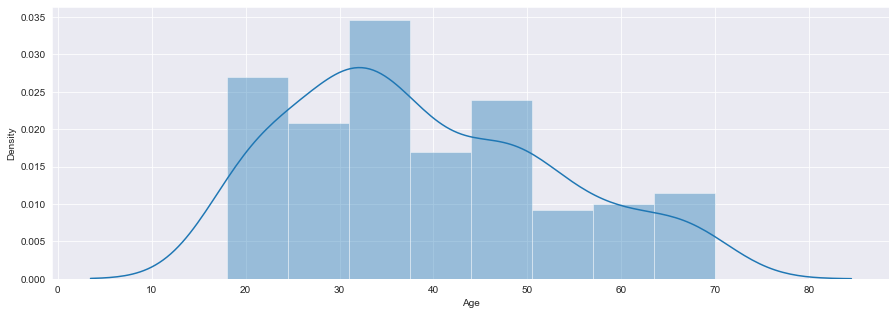

In [8]:
sns.distplot(data_df["Age"])
plt.show()

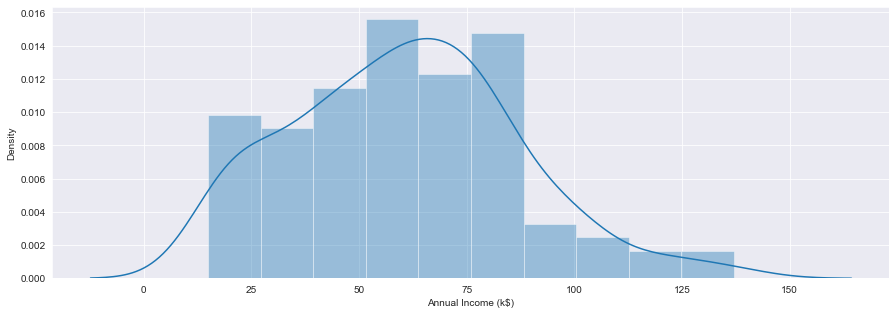

In [9]:
sns.distplot(data_df["Annual Income (k$)"])
plt.show()

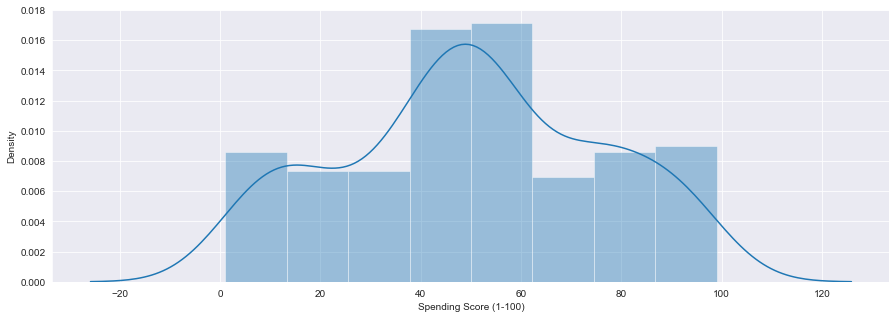

In [10]:
sns.distplot(data_df["Spending Score (1-100)"])
plt.show()

In [11]:
# In the age, from age 50-70 is under represented

# in the Annual income, Mijority of the population make less than $85K a month.

# in Spending score, people mainly have a spending score of 40-60 but you can 
# see there is a slight symetrical. Dont know how that effect histo but it was 
# funny to see.


In [12]:
data_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

NameError: name 'legend' is not defined

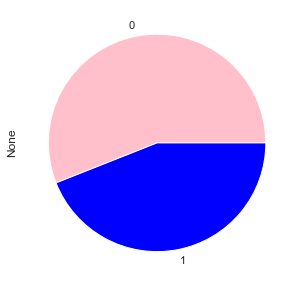

In [36]:
data_df.groupby('Gender').size().plot(kind='pie',colors=["pink","Blue"])
plt.show()


In [14]:
#Female are represented more than me in this dataset. 

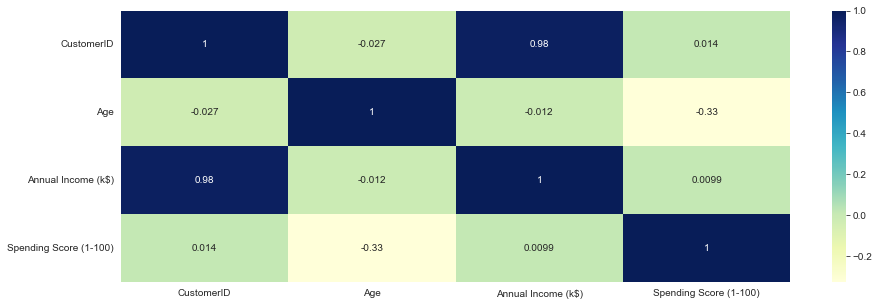

In [15]:
sns.heatmap(data_df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [16]:
# There is an interesting multicolinarity between Annnual income and Customer ID. 

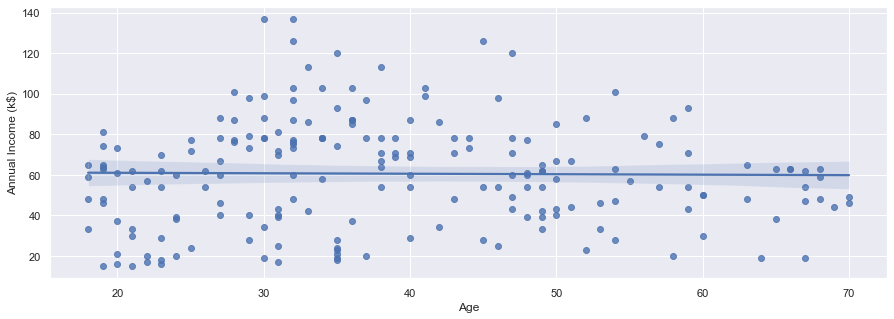

In [17]:
sns.set_theme(color_codes=True)
ax = sns.regplot(x="Age", y="Annual Income (k$)", data=data_df)
plt.show()

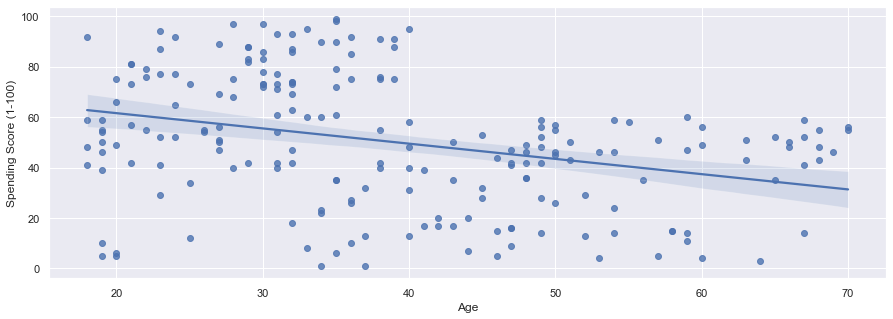

In [18]:
sns.set_theme(color_codes=True)
ax = sns.regplot(x="Age", y="Spending Score (1-100)", data=data_df)
plt.show()

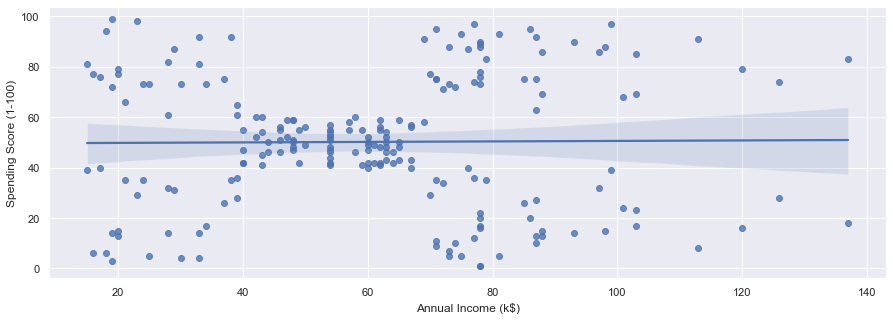

In [19]:
sns.set_theme(color_codes=True)
ax = sns.regplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=data_df)
plt.show()

In [20]:
# There is a well defined line splitting the data, on all the line plot graphed.

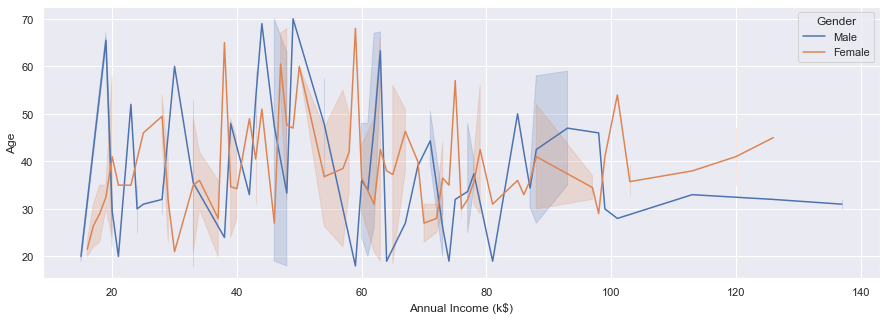

In [21]:

sns.lineplot(data=data_df, x="Annual Income (k$)", y="Age", hue="Gender")
plt.show()

In [22]:
# Using the graph, i can say that there is more variation in the female is more signifiicant than males.

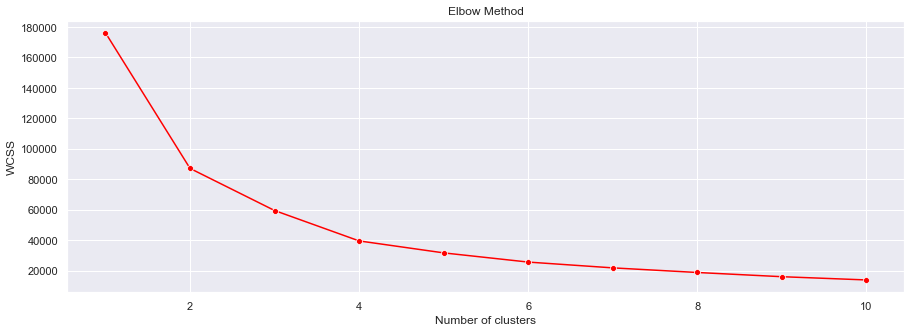

In [23]:
from sklearn.cluster import KMeans

X = data_df.iloc[:, [2, 3]].values
wcss = []
for i in range(1, 11):

    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X)

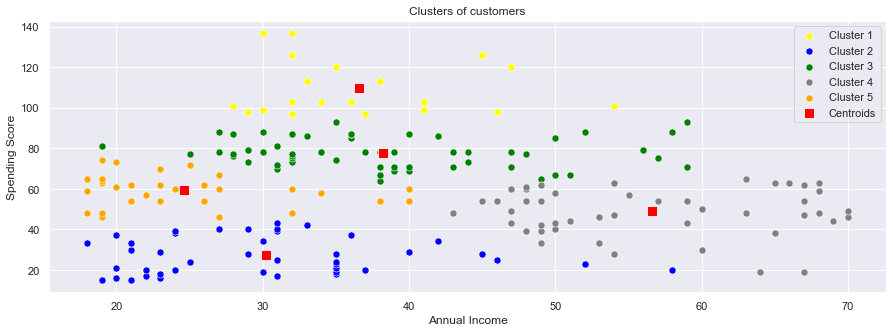

In [25]:
sns.scatterplot(x=X[y_pred == 0, 0], y=X[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_pred == 1, 0], y=X[y_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_pred == 2, 0], y=X[y_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_pred == 3, 0], y=X[y_pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X[y_pred == 4, 0], y=X[y_pred == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=100,marker=',')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [26]:
data_df['Gender'] = data_df['Gender'].map({"Male":1 , "Female":0})

In [27]:
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data_df)

normalized_df = normalize(data_df)

normalized_df = pd.DataFrame(data=normalized_df)


In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(normalized_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
X_principal.head()

,P1,P2
0,0.765352,-0.072438
1,0.803110,-0.273854
2,0.368052,0.558537
3,0.783646,-0.243554
4,0.700914,0.101097


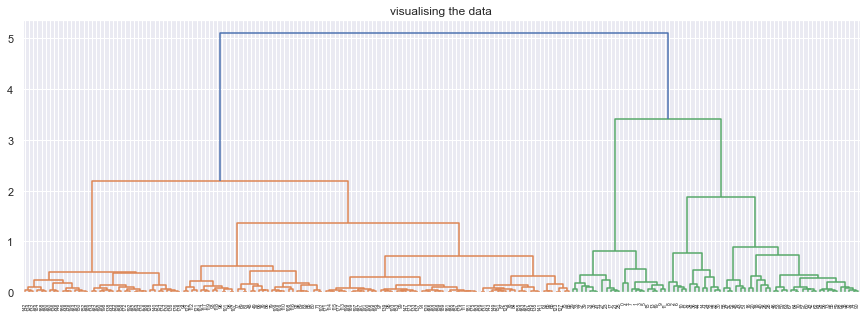

In [29]:
import scipy.cluster.hierarchy as shc
plt.title('visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

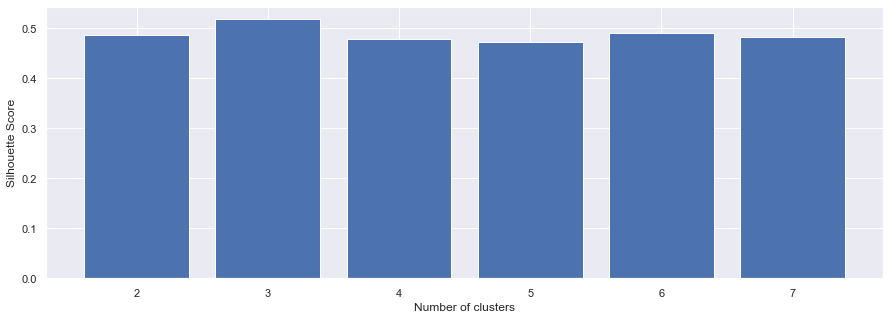

In [30]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append(silhouette_score(X_principal,AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal)))


plt.bar(x=range(2, 8), height=silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [31]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=3)

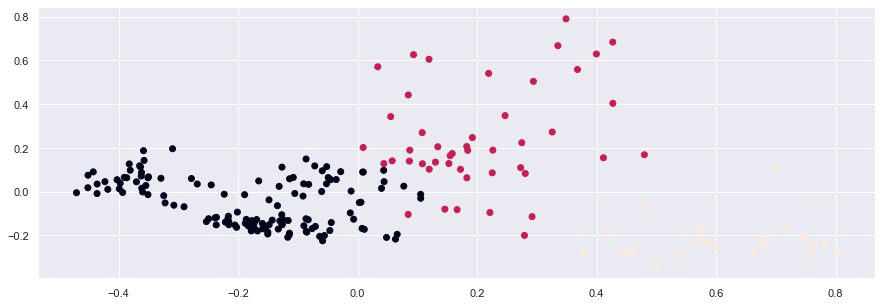

In [32]:
plt.scatter(X_principal['P1'], X_principal['P2'],c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal))
plt.show()

In [33]:
# k-means clustering tries to group similar kinds of items in form of clusters.  by  finding the similarity between 
# the items and groups them into the clusters.
# Advantages of K-means
# It is very simple to implement.
# It is scalable to a huge data set and also faster to large datasets.
# it adapts the new examples very frequently.
# Generalization of clusters for different shapes and sizes.
# Disadvantages of K-means
# It is sensitive to the outliers.
# Choosing the k values manually is a tough job.
# As the number of dimensions increases its scalability decreases

# Example of K-Mean :
# Clustering helps in identification of groups of houses on the basis of their value, type and geographical locations.

In [34]:
# Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm 
# that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.
# The advantage of Hierarchical Clustering is we don’t have to pre-specify the clusters. 
# disadvantages of the Hierarchical Clustering algorithm that it is not suitable for large datasets.
# Example of Hierarchical clustering,
# all files and folders on the hard disk are organized in a hierarchy. 